# Group Proposal

In [ ]:
By: Tracy Gan, Zhuoran Wang, Bruce Xie, Raunaq Sodhi

## Heart Disease
Today we will explore the heart disease dataset. We are trying to predict the Angiographic disease status by using all of the variables down below from columns 1-13.  

The columns in this dataset are:
1. Age - in years
2. Sex - (1 = male; 0 = female)
3. Chest Pain Type - (1 = typical angina)
                     (2 = atypical angina)
                     (3 = non-anginal pain)
                     (4 = asymptomatic)
4. Resting Blood Pressure - in mm Hg
5. Cholesterol - in mg/dl
6. Fasting Blood Sugar - (> 120 mg/dl)
                       - (1 = true; 0 = false)
7. Resting ECG
8. Maximum heart rate
9. Exercised induced angina - (1 = yes; 0 = no)
10. ST depression induced by exercise relative to rest
11. Slope of peak exercise ST segment
12. Number of major vessels 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Angiographic disease status - (0 : < 50% diameter narrowing)
                                - (1 : > 50% diameter narrowing)

In [49]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [50]:
set.seed(20)

heart_data <- read_csv("data/processed.cleveland (1).data", col_names = FALSE) |>
                mutate(X14 = as_factor(X14))

colnames(heart_data) <- c("age","sex","cp","trestbps","chol","fbs","restecg","thalach",
                                    "exang","oldpeak","slope","ca","thal","num") 
                              
heart_data
# clean into tidy data
# set.seed 
# split data into training and testing (70:30)/(75:25)?
# group_by and summarise to ensure class proportions are preserved
# plot a graph of our training data

    

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [51]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = num) 
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 


We split our data into 75% of training data and 25% of testing data. This is because the percentage of training data is proportional to different number of angiographic disease status. 

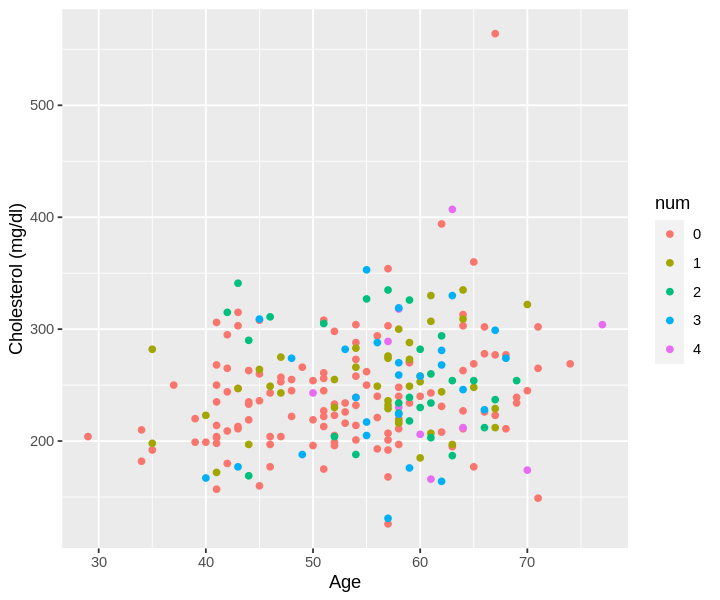

In [52]:
heart_plot_chol <- heart_train |>
            ggplot(aes (x = age, y = chol, color = num)) +
            geom_point() +
            labs(x = "Age", y = "Cholesterol (mg/dl)") 

heart_plot_chol

This scatterplot shows the correlation between Age and Chloesterol in mg/dl.

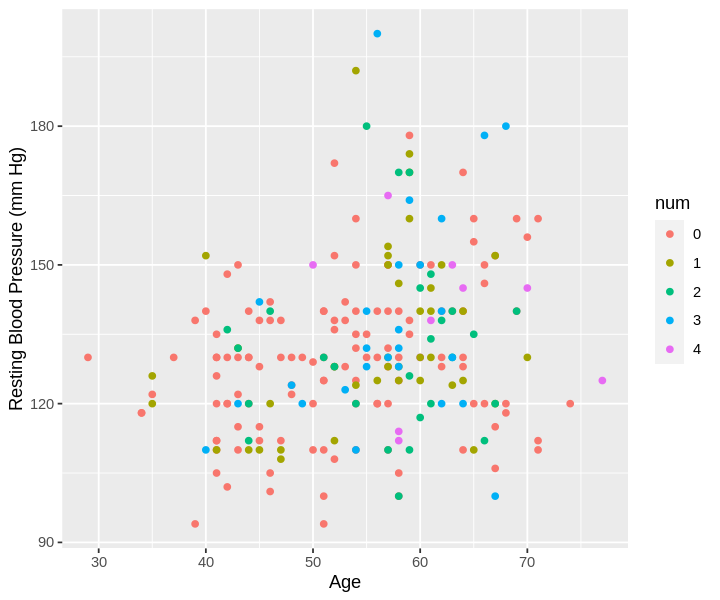

In [53]:
heart_plot_trestbps <- heart_train |>
            ggplot(aes (x = age, y = trestbps, color = num)) +
            geom_point() +
            labs(x = "Age", y = "Resting Blood Pressure (mm Hg)") 
heart_plot_trestbps

This scatterplot shows the correlation between Age and Resting Blood Pressure in mm Hg.

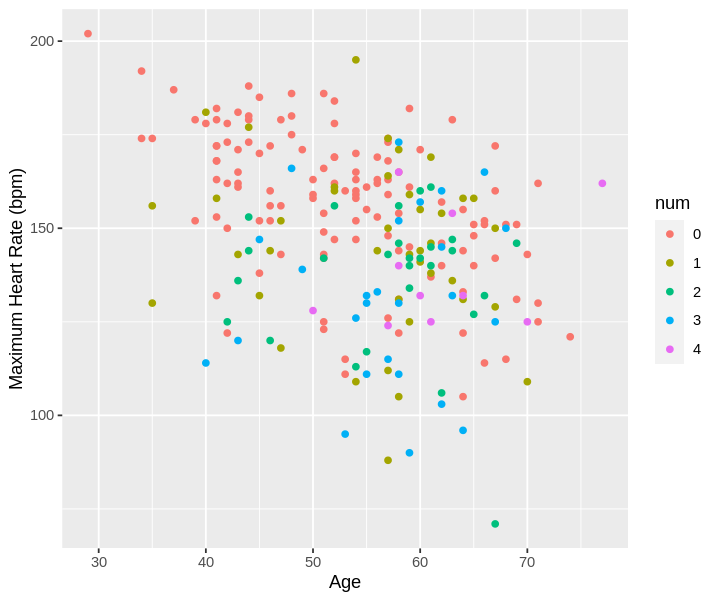

In [54]:
heart_plot_thalach <- heart_train |>
            ggplot(aes (x = age, y = thalach, color = num)) +
            geom_point() +
            labs(x = "Age", y = "Maximum Heart Rate (bpm)")
heart_plot_thalach

This scatterplot shows the correlation between Age and Maximum Heart Rate in beats per minute.

Method

1. Split the data into both training and testing data of ratio (75:25)
2. Scale and center the training data  
3. Train classifier 
4. Perform cross validation to determine the most accurate value of K
5. Use this K to create our model
                       

We want to use our model to use the variables of patient A, to determine whether the angiographic disease status of patient. this will allow us to know if patient A has heart disease. This findings can help the doctor to think about solutions for treatment for patient A. 


In [ ]:
# cite our sources